## Example Python Jupyter Notebook Online: Binder Tutorial
This Jupyter Notebook is an example for the tutorial on how to use Binder for reproducible research. It contains the code for creating some data visualizations using Python Seaborn. After that is done a repeated measures ANOVA using pingouin

In [1]:
%matplotlib inline
import pandas as pd


# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

# Getting the data
data = "https://vincentarelbundock.github.io/Rdatasets/csv/carData/OBrienKaiser.csv"

# Loading the data into a Pandas dataframe
df = pd.read_csv(data, index_col=0)

# Using Pandas head to check the first 5 rows of the dataframe
df.head()

,treatment,gender,pre.1,pre.2,pre.3,pre.4,pre.5,post.1,post.2,post.3,post.4,post.5,fup.1,fup.2,fup.3,fup.4,fup.5
1,control,M,1,2,4,2,1,3,2,5,3,2,2,3,2,4,4
2,control,M,4,4,5,3,4,2,2,3,5,3,4,5,6,4,1
3,control,M,5,6,5,7,7,4,5,7,5,4,7,6,9,7,6
4,control,F,5,4,7,5,4,2,2,3,5,3,4,4,5,3,4
5,control,F,3,4,6,4,3,6,7,8,6,3,4,3,6,4,3


In [2]:
df["id"] = df.index
df_long = pd.wide_to_long(df, ["pre", "post", "fup"], 
                i=["id", "gender", "treatment"], 
                j='hour', sep=".").reset_index()

df_long = pd.melt(df_long,id_vars=["id", "gender", "treatment", "hour"], 
                  var_name='phase', value_name='value')

df_long.head()

,id,gender,treatment,hour,phase,value
0,1,M,control,1,pre,1
1,1,M,control,2,pre,2
2,1,M,control,3,pre,4
3,1,M,control,4,pre,2
4,1,M,control,5,pre,1


## Box Plots in Python using Seaborn
Time for some data visualization and we start by creating a box plot using Seaborn

<Figure size 864x864 with 0 Axes>

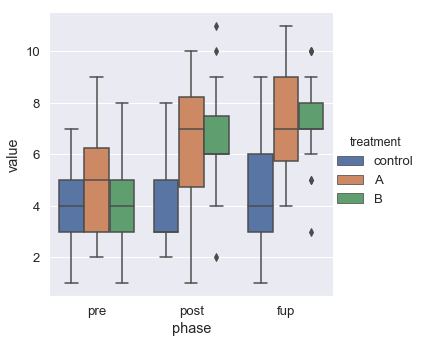

In [5]:
import seaborn as sns

# Change the size of the font
sns.set(font_scale=1.2)

g = sns.catplot(x="phase", y="value", kind="box",
                hue="treatment", data=df_long)

## Line Plots using Seaborn
Next, we create some simple lineplots.

In [ ]:
 ax = sns.lineplot(x="phase", y="value", hue="treatment",
                   data=df_long)

## Two-Way Mixed ANOVA in Python
Lets analyze the data using a Two-Way Mixed ANOVA using the Python package Pingouin

In [6]:
from pingouin import mixed_anova

aov = mixed_anova(dv='value', between='treatment',
                  within='phase', subject='id', data=df_long)

print(aov)

        Source     SS  DF1  DF2      MS       F     p-unc    np2    eps
0    treatment  37.35    2   13  18.675   2.914  0.090042  0.310      -
1        phase  33.50    2   26  16.750  23.626  0.000001  0.645  0.772
2  Interaction  15.40    4   26   3.850   5.430  0.002578  0.455      -
